In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [77]:
def simple_region_growing(img, seed, threshold=1):
    '''
    Usual inplementation with for loops
    
    args: img - grayscale image,
          seed - 2D starting point
          threshold - terminal value for pixel difference
          
    output: reg - region of the seed point
    '''
    dims = img.shape
    reg = np.zeros((dims[0], dims[1]), np.uint8)
    #parameters
    mean_reg = float(img[seed[1], seed[0]])
    size = 1
    pix_area = dims[0]*dims[1]
    contour = [] # will be [ [[x1, y1], val1],..., [[xn, yn], valn] ]
    contour_val = []
    dist = 0
    # TODO: may be enhanced later with 8th connectivity
    orient = [(1, 0), (0, 1), (-1, 0), (0, -1),(-1,1),(1,1),(1,-1),(-1,-1)] # 8 connectivity
    cur_pix = [seed[0], seed[1]]

    #Spreading
    while(dist<threshold and size<pix_area):
    #adding pixels
        for j in range(len(orient)):
            #select new candidate
            temp_pix = [cur_pix[0] +orient[j][0], cur_pix[1] +orient[j][1]]
            
            #check if it belongs to the image
            is_in_img = dims[0]>temp_pix[0]>0 and dims[1]>temp_pix[1]>0 #returns boolean
            #candidate is taken if not already selected before
            if (is_in_img and (reg[temp_pix[1], temp_pix[0]]==0)):
                contour.append(temp_pix)
                contour_val.append(img[temp_pix[1], temp_pix[0]] )
                reg[temp_pix[1], temp_pix[0]] = 150
        #add the nearest pixel of the contour in it
        dist = abs(int(np.mean(contour_val)) - mean_reg)
    
        dist_list = [abs(i - mean_reg) for i in contour_val ]
        dist = min(dist_list)    #get min distance
        index = dist_list.index(min(dist_list)) #mean distance index
        size += 1 # updating region size
        reg[cur_pix[1], cur_pix[0]] = 255

        #updating mean MUST BE FLOAT
        mean_reg = (mean_reg*size + float(contour_val[index]))/(size+1)
        #updating seed
        cur_pix = contour[index]
        #print(cur_pix)

        #removing pixel from neigborhood
        del contour[index]
        del contour_val[index]
    return reg

In [78]:
import pdb
def vectorized_region_growing(img, seed, threshold=1):
    '''
    Vectorized implementation with numpy arrays
    
    args: img - grayscale image,
          seed - 2D starting point
          threshold - terminal value for pixel difference
          
    output: reg - region of the seed point
    '''
    
    dims = img.shape
    reg = np.zeros((dims[0], dims[1]), np.uint8)
    #parameters
    mean_reg = float(img[seed[1], seed[0]])
    size = 1
    dist=0
    pix_area = dims[0]*dims[1]
    contour = [] # will be [ [[x1, y1], val1],..., [[xn, yn], valn] ]
    contour_val = []
    # TODO: may be enhanced later with 8th connectivity
    orient = np.array([(1, 0), (0, 1), (-1, 0), (0, -1),(-1,1),(1,1),(1,-1),(-1,-1)]) # 8 connectivity
    cur_pix = [seed[0], seed[1]]
    
    #Spreading
    while(dist<threshold and size<pix_area):
    #adding pixels
        
       
        temp_pix = np.array([cur_pix[0] +orient[:,0], cur_pix[1] +orient[:,1]]).T
    
        is_in_img = is_in_img = ((dims[0]>temp_pix[:,0]) & (temp_pix[:,0]>0)) &\
                                ((dims[1]>temp_pix[:,1]) & (temp_pix[:,1]>0))
            
        temp_pix = temp_pix[is_in_img]    
        indecies = np.argwhere(reg[temp_pix[:,1], temp_pix[:,0]]==0)    
        values = temp_pix[indecies.flatten()]
        contour.extend(values) 
        contour_val.extend(img[values[:,1], values[:,0]]) 
        
        reg[values[:,1], values[:,0]] = 150
        
        dist_list =np.abs(np.array(contour_val) - mean_reg)  
        
        index = np.argmin(dist_list) #mean distance index
        dist = dist_list[index]
        size += 1 # updating region size
        reg[cur_pix[1], cur_pix[0]] = 255
        mean_reg = (mean_reg*size + float(contour_val[index]))/(size+1)
        #updating seed
        cur_pix = contour[index]
        #removing pixel from neigborhood
        del contour[index]
        del contour_val[index]
    
    return reg

In [5]:
img=cv.imread("lena.jpg",0)

In [82]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

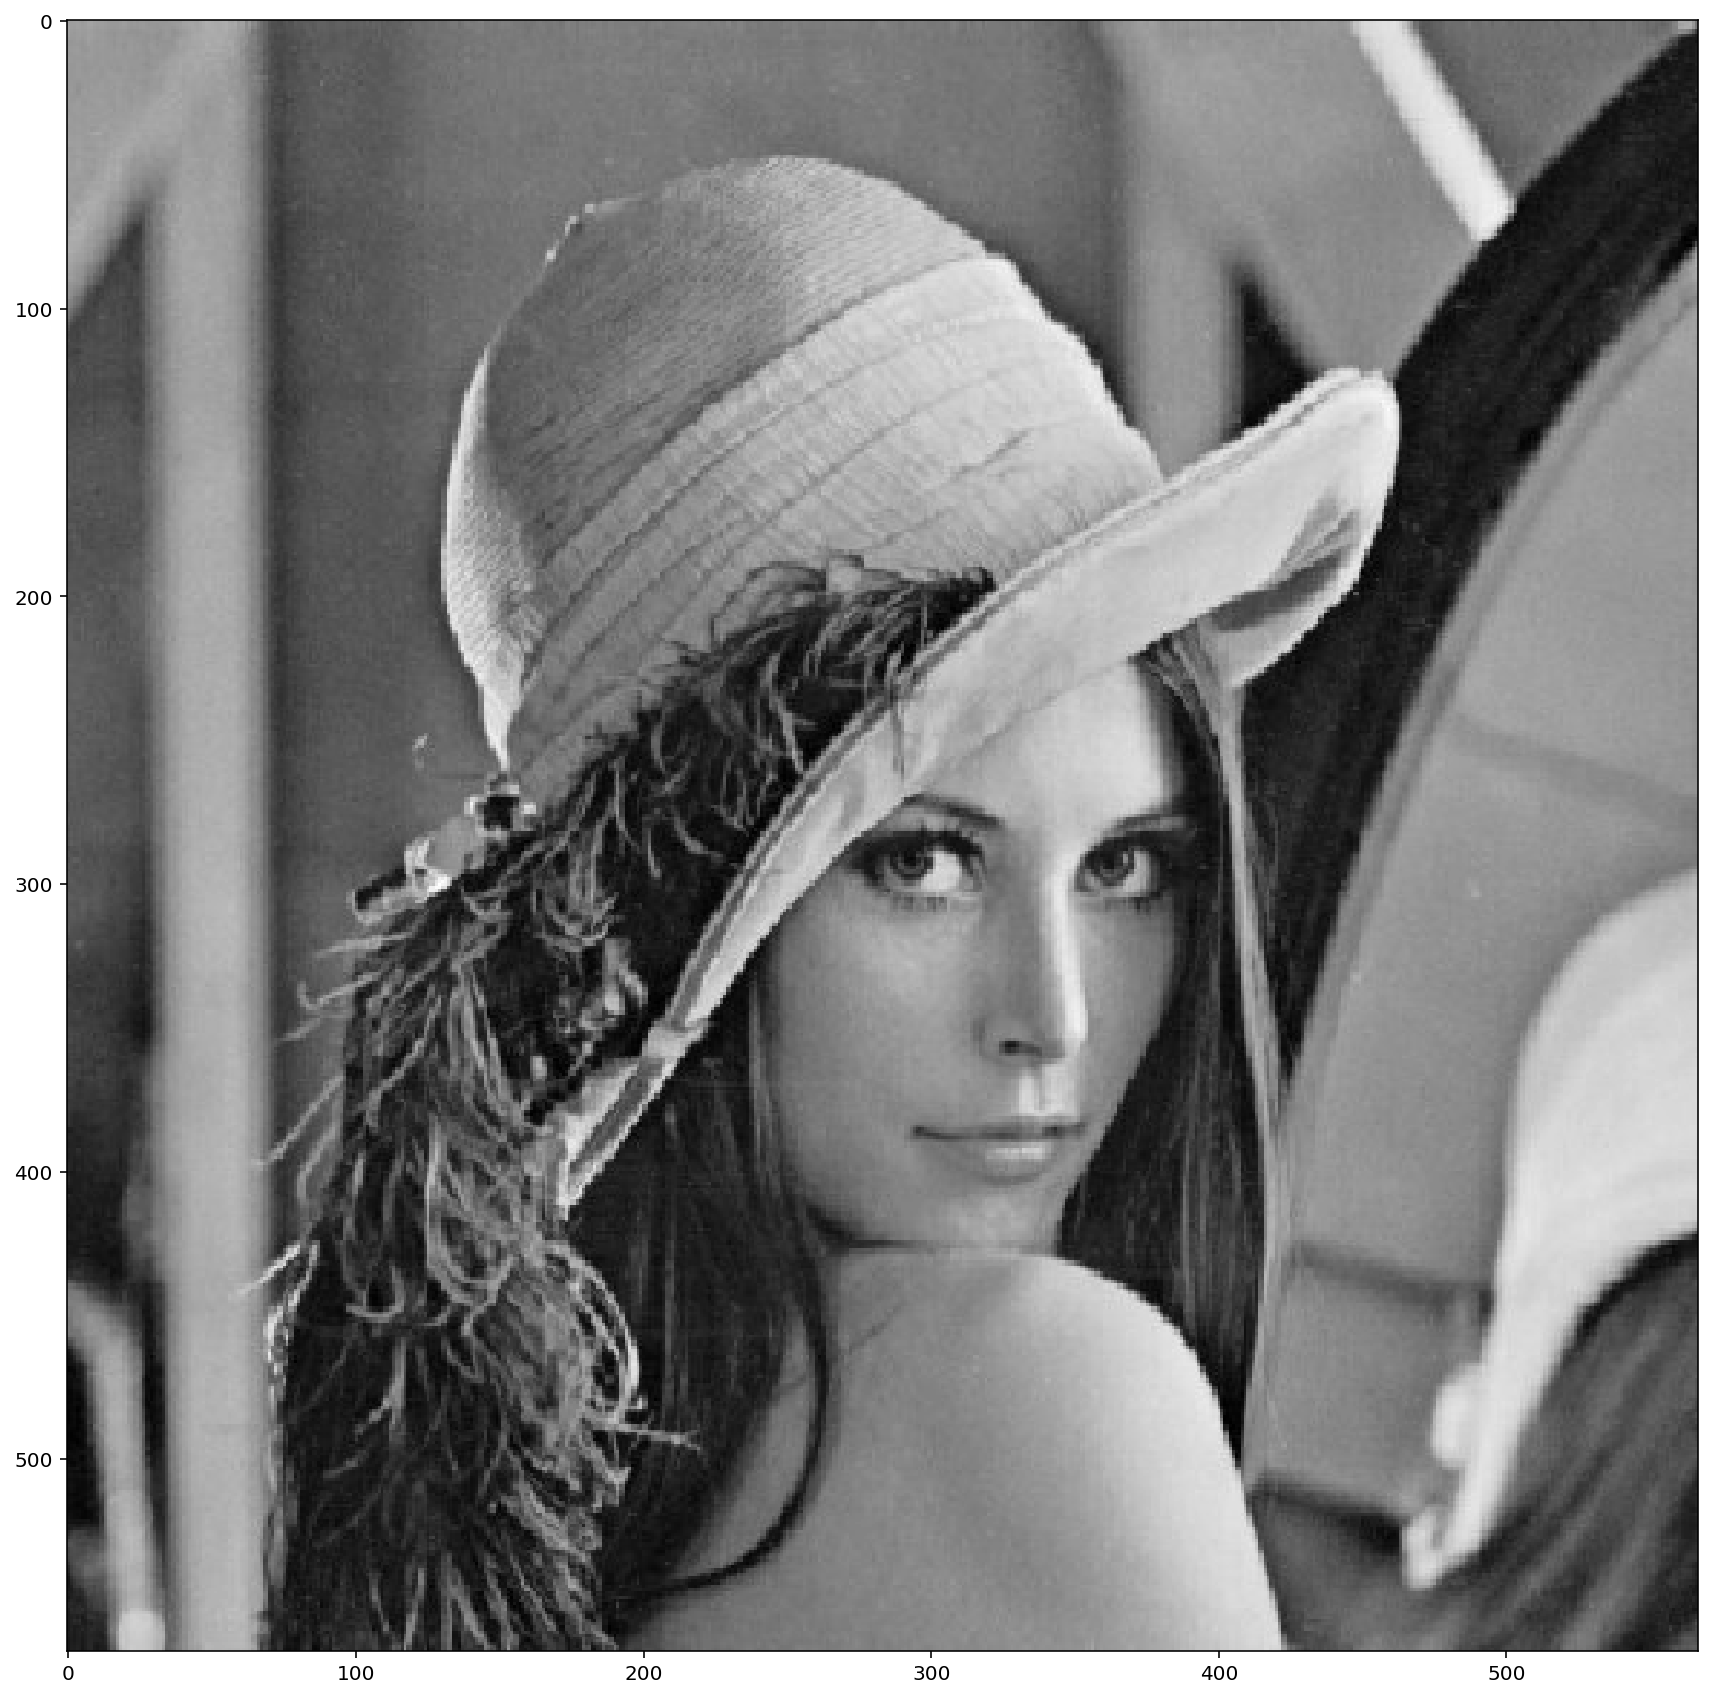

In [85]:
f,axis = plt.subplots(figsize=(15,15))
plt.imshow(img, cmap="gray")

In [76]:
%%time
segmented_img = simple_region_growing(img, (350, 310), threshold=20)

CPU times: user 2min 53s, sys: 1.28 s, total: 2min 55s
Wall time: 3min 23s


In [74]:
%%time
segmented_img = vectorized_region_growing(img, (350, 310), threshold=20)

CPU times: user 6.75 s, sys: 26.6 ms, total: 6.78 s
Wall time: 7.16 s


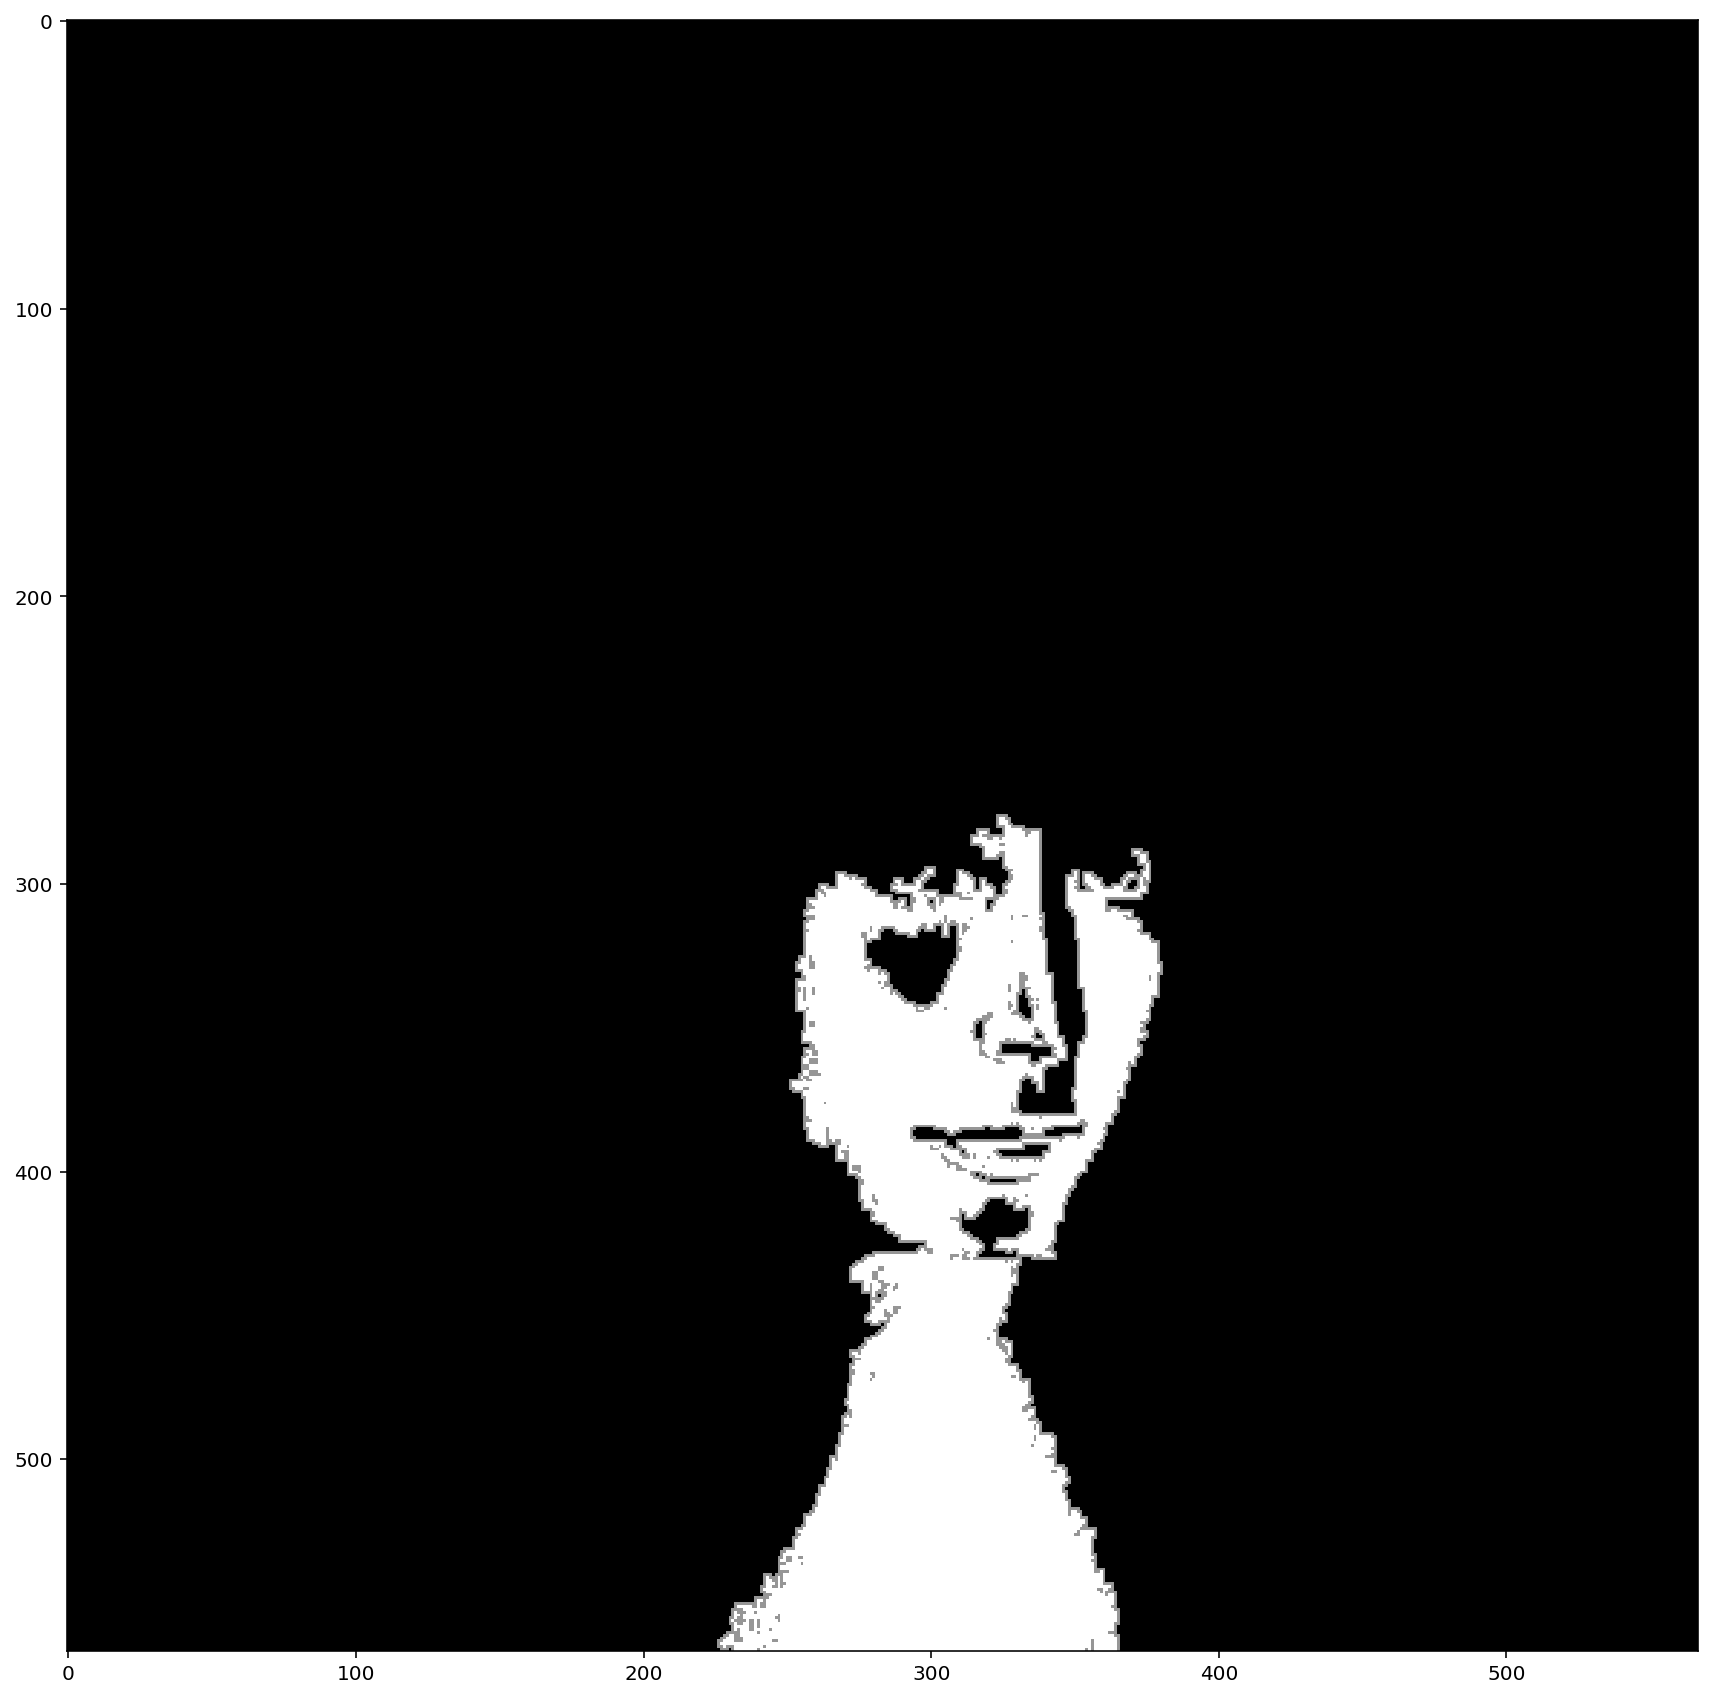

In [83]:
f,axis = plt.subplots(figsize=(15,15))

plt.imshow(segmented_img, cmap="gray")